In [33]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [14]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, add it to a the list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

619

In [16]:
# Create an empty list to hold weater data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create the counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the City.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each city.
    try:
        # Parse the json and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | negara
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | port hardy
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | rio grande
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | chiredzi
Processing Record 14 of Set 1 | abiy adi
City not found. Skipping...
Processing Record 15 of Set 1 | yurla
Processing Record 16 of Set 1 | ulaangom
Processing Record 17 of Set 1 | auki
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | katsuura
Processing Record 23 o

Processing Record 37 of Set 4 | san jose
Processing Record 38 of Set 4 | dalmatovo
Processing Record 39 of Set 4 | the pas
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | safwah
City not found. Skipping...
Processing Record 42 of Set 4 | buin
Processing Record 43 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 44 of Set 4 | peachland
Processing Record 45 of Set 4 | mackenzie
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | nizwa
Processing Record 48 of Set 4 | vestmannaeyjar
Processing Record 49 of Set 4 | taunggyi
Processing Record 50 of Set 4 | cam pha
City not found. Skipping...
Processing Record 1 of Set 5 | batagay-alyta
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | zhigansk
Processing Record 4 of Set 5 | tessalit
Processing Record 5 of Set 5 | wuhu
Processing Record 6 of Set 5 | ballina
Processing Record 7 of Set 5 | moju
Processing Record 8 of Set 5 | olga


Processing Record 23 of Set 8 | kisiwani
Processing Record 24 of Set 8 | salalah
Processing Record 25 of Set 8 | adelaide
Processing Record 26 of Set 8 | grand centre
City not found. Skipping...
Processing Record 27 of Set 8 | san gavino monreale
Processing Record 28 of Set 8 | bonfim
Processing Record 29 of Set 8 | esperance
Processing Record 30 of Set 8 | saldanha
Processing Record 31 of Set 8 | xichang
Processing Record 32 of Set 8 | corinth
Processing Record 33 of Set 8 | kilindoni
Processing Record 34 of Set 8 | libenge
Processing Record 35 of Set 8 | ossora
Processing Record 36 of Set 8 | lagoa
Processing Record 37 of Set 8 | eureka
Processing Record 38 of Set 8 | palu
Processing Record 39 of Set 8 | cao bang
Processing Record 40 of Set 8 | gravdal
Processing Record 41 of Set 8 | vanimo
Processing Record 42 of Set 8 | boa vista
Processing Record 43 of Set 8 | ambilobe
Processing Record 44 of Set 8 | mahajanga
Processing Record 45 of Set 8 | yar-sale
Processing Record 46 of Set 8 

Processing Record 9 of Set 12 | marfino
Processing Record 10 of Set 12 | brahmapuri
City not found. Skipping...
Processing Record 11 of Set 12 | mocambique
City not found. Skipping...
Processing Record 12 of Set 12 | manokwari
Processing Record 13 of Set 12 | menongue
Processing Record 14 of Set 12 | altamira
Processing Record 15 of Set 12 | yambio
Processing Record 16 of Set 12 | jalapa
Processing Record 17 of Set 12 | hoa binh
Processing Record 18 of Set 12 | revda
Processing Record 19 of Set 12 | presidencia roque saenz pena
Processing Record 20 of Set 12 | clyde river
Processing Record 21 of Set 12 | chifeng
Processing Record 22 of Set 12 | longyearbyen
Processing Record 23 of Set 12 | antofagasta
Processing Record 24 of Set 12 | atar
Processing Record 25 of Set 12 | amalapuram
Processing Record 26 of Set 12 | troy
Processing Record 27 of Set 12 | nizhniy tsasuchey
Processing Record 28 of Set 12 | nioro
Processing Record 29 of Set 12 | fier
Processing Record 30 of Set 12 | caravela

In [17]:
# number of cities retrieved 
len(city_data)

558

In [28]:
# Convert the array of dictionaries to a Pandas Dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.93,125.41,69.57,64,91,2.93,TL,2020-04-14 04:46:25
1,Ushuaia,-54.80,-68.30,46.40,65,75,9.17,AR,2020-04-14 04:46:25
2,Hilo,19.73,-155.09,78.80,74,20,10.29,US,2020-04-14 04:46:26
3,Rikitea,-23.12,-134.97,77.02,69,81,12.01,PF,2020-04-14 04:42:39
4,Negara,-8.32,114.60,84.38,68,11,7.94,ID,2020-04-14 04:46:26


In [29]:
# Reorder the columns
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Airai,TL,2020-04-14 04:46:25,-8.93,125.41,69.57,64,91,2.93
1,Ushuaia,AR,2020-04-14 04:46:25,-54.80,-68.30,46.40,65,75,9.17
2,Hilo,US,2020-04-14 04:46:26,19.73,-155.09,78.80,74,20,10.29
3,Rikitea,PF,2020-04-14 04:42:39,-23.12,-134.97,77.02,69,81,12.01
4,Negara,ID,2020-04-14 04:46:26,-8.32,114.60,84.38,68,11,7.94


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

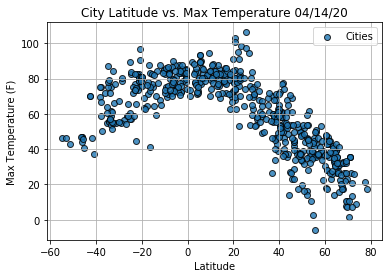

In [54]:
# Build a scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=.8,
           label="Cities")

# Titles and labels
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend()
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show the plot.
plt.show()

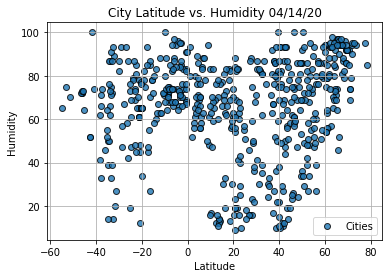

In [56]:
# Build a scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=.8,
           label="Cities")

# Titles and labels
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend()
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show the plot.
plt.show()

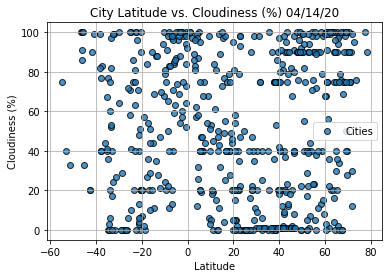

In [59]:
# Build a scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=.8,
           label="Cities")

# Titles and labels
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show the plot.
plt.show()

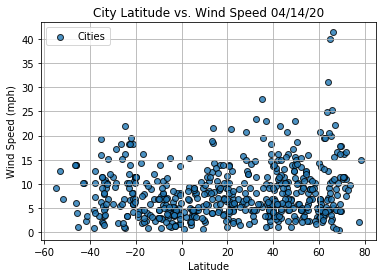

In [60]:
# Build a scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=.8,
           label="Cities")

# Titles and labels
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend()
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show the plot.
plt.show()